Importar librerias

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Cargando dataset

In [2]:
data = pd.read_csv('tic-tac-toe.csv')

Codificando valores

In [3]:
data_encoded = pd.get_dummies(data, drop_first=True)
print(data_encoded)

     top-left-square_o  top-left-square_x  top-middle-square_o  \
0                False               True                False   
1                False               True                False   
2                False               True                False   
3                False               True                False   
4                False               True                False   
..                 ...                ...                  ...   
953               True              False                False   
954               True              False                False   
955               True              False                False   
956               True              False                False   
957               True              False                 True   

     top-middle-square_x  top-right-square_o  top-right-square_x  \
0                   True               False                True   
1                   True               False                True   
2  

Separando caracteristicas y separando en prueba y entrenamiento

In [4]:
X = data_encoded.drop('Class_positive', axis=1)  # Features
y = data_encoded['Class_positive']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creando modelo,entrenando y prediciendo

In [5]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Evaluando

In [6]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.97      0.94      0.95        67
        True       0.97      0.98      0.98       125

    accuracy                           0.97       192
   macro avg       0.97      0.96      0.97       192
weighted avg       0.97      0.97      0.97       192



Dibujando el arbol

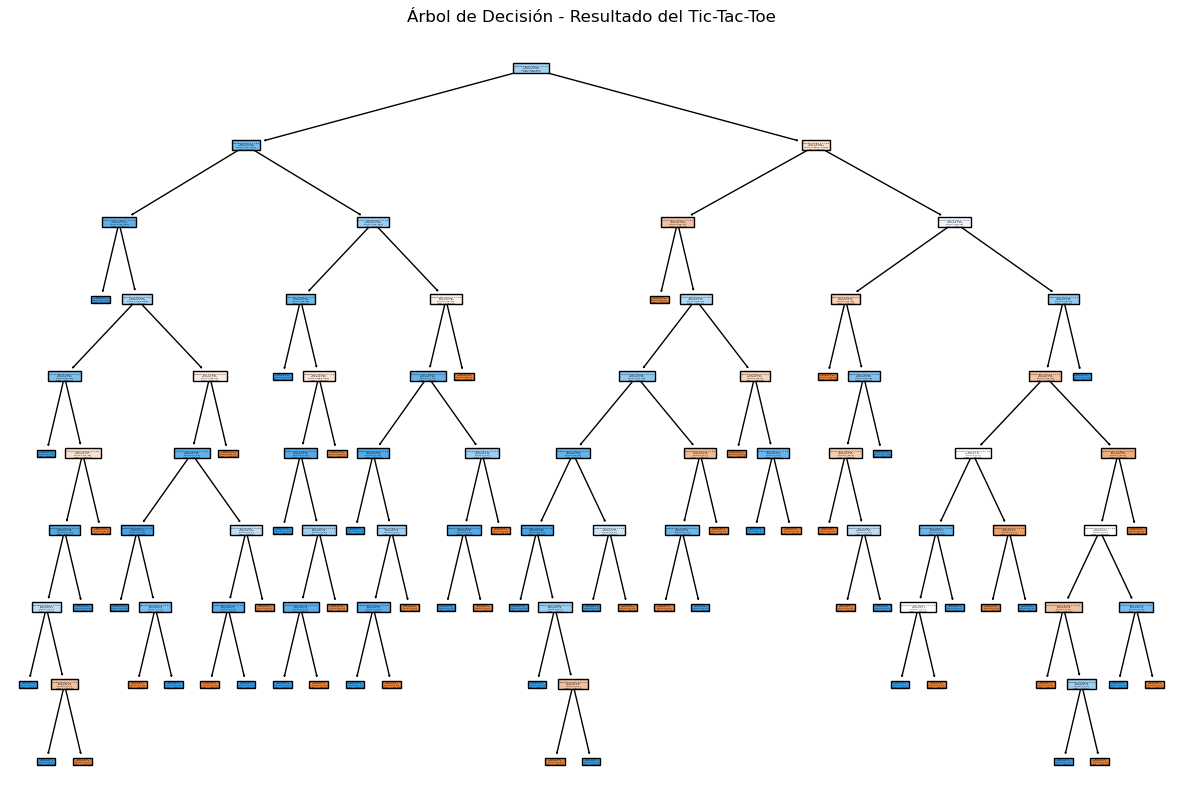

In [7]:
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['negative', 'positive'])
plt.title("Árbol de Decisión - Resultado del Tic-Tac-Toe")
plt.show()